In [101]:
import sentencepiece as spm

In [102]:
sp = spm.SentencePieceProcessor(model_file='wd5m_with_pad.model')

In [103]:
sp.encode(['united states of america'])

[[28, 40, 7, 45]]

In [52]:
fname = 'data/wikidata5m/aliases.txt'
entities = []
for line in open(fname):
    if line[-1] == '\n':
        line = line[:-1]
    entities.append(line.split('\t')[1])

In [53]:
len(entities)

4819507

In [54]:
sp.encode([entities[0]])

[[1519, 714, 19, 3956]]

In [59]:
from tqdm import tqdm
lengths = []
for e in tqdm(entities):
    encoded = sp.encode(e)
    lengths.append(len(encoded))

100%|██████████| 4819507/4819507 [00:29<00:00, 161783.54it/s]


In [60]:
max(lengths)

105

In [63]:
count = 0
for i,l in enumerate(lengths):
    if l > 50:
        count += 1
        print(entities[i])
count

glca-beta-(1-2)-d-man-alpha-(1-3)-d-glc-beta-(1-4)-d-glc-alpha-1-diphospho-ditrans,octacis-undecaprenol 4-beta-mannosyltransferase
n-acetylmuramoyl-l-alanyl-d-glutamyl-l-lysyl-(n6-glycyl)-d-alanyl-d-alanine-diphosphoundecaprenyl-n-acetylglucosamine:glycine glycyltransferase
suzukake no ki no michi de "kimi no hohoemi o yume ni miru" to itte shimattara bokutachi no kankei wa do kawatte shimau no ka, bokunari ni nan-nichi ka kangaeta ue de no yaya kihazukashii ketsuron no yo na mono
n-[6-[(6ar,10ar)-1-hydroxy-6,6,9-trimethyl-6a,7,10,10a-tetrahydrobenzo[c][1]benzopyran-3-yl]hex-4-ynyl]methanesulfonamide
(4ar,10br)-4-propyl-3,4a,5,10b-tetrahydro-2h-[1]benzopyrano[4,3-b][1,4]oxazin-9-ol
the sad but true story of ray mingus, the lumberjack of bulk rock city, and his never slacking stribe in exploiting the so far undiscovered areas of the intention to bodily intercourse from the opposite species of his kind...
2,3,4,5,6-pentahydroxy-1-[4-[4-[(2,3,4,5,6-pentahydroxy-1-sulfohexyl)amino]phenyl]s

18

In [77]:
test = []
fname = 'data/wikidata5m/valid.txt'
for line in open(fname):
    test.append(line[:-1])

In [78]:
test_lengths = []
for t in test:
    test_lengths.append(len(sp.encode(t)))

In [79]:
max(test_lengths)

35

Text(0.5, 0, 'Tokenized lengths')

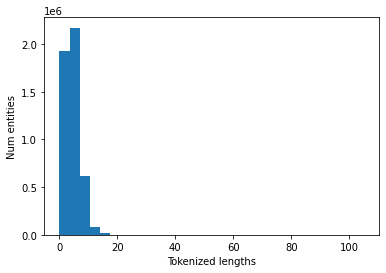

In [81]:
import matplotlib.pyplot as plt 

import numpy as np 

%matplotlib inline

# x = np.random.normal(size = 1000) 
x = lengths
plt.hist(x, bins=30) 

plt.ylabel('Num entities');
plt.xlabel('Tokenized lengths')

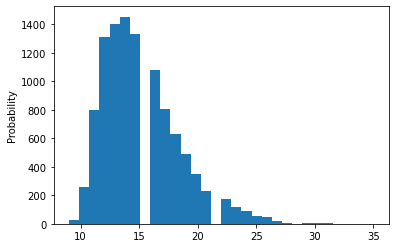

In [80]:
x = test_lengths
plt.hist(x, bins=30) 

plt.ylabel('Probability');

In [96]:
from transformers import T5TokenizerFast

In [97]:
tokenizer = T5TokenizerFast.from_pretrained('t5-small')

In [98]:
lengths_t5 = []
for e in tqdm(entities):
    ids = tokenizer(e).input_ids
    lengths_t5.append(len(ids))

100%|██████████| 4819507/4819507 [05:54<00:00, 13610.60it/s]


Text(0.5, 0, 'Tokenized lengths')

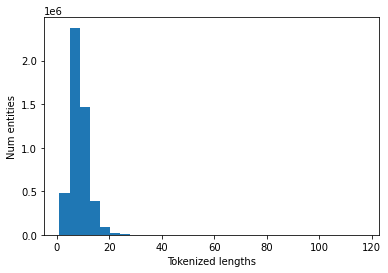

In [99]:
import matplotlib.pyplot as plt 

import numpy as np 

%matplotlib inline

# x = np.random.normal(size = 1000) 
x = lengths_t5
plt.hist(x, bins=30) 

plt.ylabel('Num entities');
plt.xlabel('Tokenized lengths')